<h2>MNIST dataset in Keras library</h2>

<h2>Load data</h2>

In [15]:
# Imports
# - Dataset
from keras.datasets import mnist
# - Helper libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
# - Graph plots
%matplotlib inline
from matplotlib import pyplot as plt
# - Keras models and layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

# Ignore warnings
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train_raw), (X_test, y_test_raw) = mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = np_utils.to_categorical(y_train_raw, 10)
y_test = np_utils.to_categorical(y_test_raw, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [3]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


<h2>Build Linear model</h2>

In [4]:
# Create Linear Softmax model
lin_clf = Sequential()
lin_clf.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
lin_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(lin_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


<h2>Train and evaluate Linear model on test data</h2>

In [5]:
# Start timer
start = time.time()

# Train model on training data
lin_clf.fit(X_train_1D, y_train, batch_size=32, epochs=8, verbose=1)
# Evaluate model on test data
score = lin_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

Epoch 1/8
60000/60000 [==============================] - 2s 34us/step - loss: 0.4718 - acc: 0.8769
Epoch 2/8
60000/60000 [==============================] - 2s 31us/step - loss: 0.3042 - acc: 0.9155
Epoch 3/8
60000/60000 [==============================] - 2s 32us/step - loss: 0.2831 - acc: 0.9204
Epoch 4/8
60000/60000 [==============================] - 2s 30us/step - loss: 0.2730 - acc: 0.9238
Epoch 5/8
60000/60000 [==============================] - 2s 30us/step - loss: 0.2668 - acc: 0.9260
Epoch 6/8
60000/60000 [==============================] - 2s 31us/step - loss: 0.2619 - acc: 0.9270
Epoch 7/8
60000/60000 [==============================] - 2s 37us/step - loss: 0.2578 - acc: 0.9288
Epoch 8/8
60000/60000 [==============================] - 2s 41us/step - loss: 0.2556 - acc: 0.9300

Test Accuracy: 92.87%
Time elapsed: 16.27 sec


<h2>Build Neural Net model</h2>

In [27]:
# Create Neural Net Softmax model
nn_clf = Sequential()
# - first Dense
nn_clf.add(Dense(128, input_dim=784, activation="elu", kernel_initializer="he_normal"))
nn_clf.add(Dropout(0.2))
# - second Dense
nn_clf.add(Dense(128, activation="elu", kernel_initializer="he_normal"))
nn_clf.add(Dropout(0.2))
# - output
nn_clf.add(Dense(10, activation="softmax"))

# Compile model
nn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(nn_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


<h2>Train and evaluate Neural Net model on test data</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 65us/step - loss: 0.1707 - acc: 0.9480 - val_loss: 0.1290 - val_acc: 0.9633
Epoch 2/15
48000/48000 [==============================] - 3s 62us/step - loss: 0.1464 - acc: 0.9541 - val_loss: 0.1188 - val_acc: 0.9657
Epoch 3/15
48000/48000 [==============================] - 3s 63us/step - loss: 0.1261 - acc: 0.9612 - val_loss: 0.1035 - val_acc: 0.9688
Epoch 4/15
48000/48000 [==============================] - 4s 80us/step - loss: 0.1129 - acc: 0.9649 - val_loss: 0.0965 - val_acc: 0.9696
Epoch 5/15
48000/48000 [==============================] - 3s 70us/step - loss: 0.0993 - acc: 0.9690 - val_loss: 0.0958 - val_acc: 0.9709
Epoch 6/15
48000/48000 [==============================] - 3s 70us/step - loss: 0.0928 - acc: 0.9711 - val_loss: 0.0853 - val_acc: 0.9739
Epoch 7/15
48000/48000 [==============================] - 4s 77us/step - loss: 0.0828 - acc: 0.9739 - val_loss: 0.0903 - val_acc

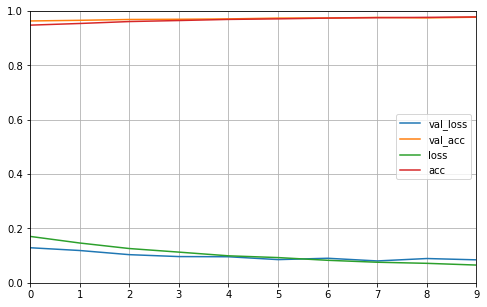

In [29]:
# Early stopping
cp = EarlyStopping(patience=2, restore_best_weights=True)

# Start timer
start = time.time()

# Train model on training data
history = nn_clf.fit(X_train_1D, y_train, batch_size=64, epochs=15, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = nn_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<h2>Build ConvNet model</h2>

In [32]:
# Create ConvNet model
cnn_clf = Sequential()
# - first conv/pool 
cnn_clf.add(Convolution2D(32, (3,3), input_shape=(28,28,1), activation="elu", padding="same", kernel_initializer="he_normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 14x14
cnn_clf.add(Dropout(0.3))
# - second conv/pool
cnn_clf.add(Convolution2D(32, (3,3), activation="elu", padding="same", kernel_initializer="he_normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 7x7
cnn_clf.add(Dropout(0.3))
# - fully connected
cnn_clf.add(Flatten())
cnn_clf.add(Dense(128, activation="elu"))
cnn_clf.add(BatchNormalization())
cnn_clf.add(Dropout(0.3))
# - output
cnn_clf.add(Dense(10, activation="softmax"))

# Compile model
cnn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(cnn_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)              0         
__________

<h2>Train and evaluate ConvNet model on test data</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 51s 1ms/step - loss: 0.2584 - acc: 0.9188 - val_loss: 0.0669 - val_acc: 0.9795
Epoch 2/15
48000/48000 [==============================] - 48s 993us/step - loss: 0.0998 - acc: 0.9689 - val_loss: 0.0570 - val_acc: 0.9825
Epoch 3/15
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0767 - acc: 0.9760 - val_loss: 0.0509 - val_acc: 0.9855
Epoch 4/15
48000/48000 [==============================] - 56s 1ms/step - loss: 0.0652 - acc: 0.9793 - val_loss: 0.0427 - val_acc: 0.9872
Epoch 5/15
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0565 - acc: 0.9822 - val_loss: 0.0358 - val_acc: 0.9894
Epoch 6/15
48000/48000 [==============================] - 65s 1ms/step - loss: 0.0521 - acc: 0.9833 - val_loss: 0.0378 - val_acc: 0.9890
Epoch 7/15
48000/48000 [==============================] - 53s 1ms/step - loss: 0.0479 - acc: 0.9842 - val_loss: 0.0343 - val_a

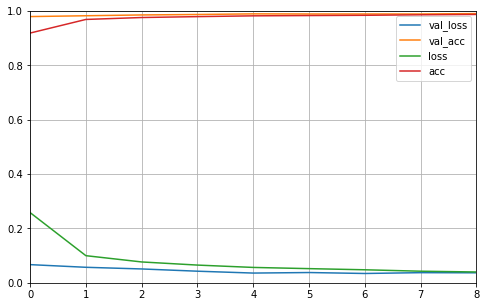

In [33]:
# Start timer
start = time.time()

# Store best model
cp = EarlyStopping(patience=2, monitor="val_loss", restore_best_weights=True)

# Train model on training data
# Note: uses 20% of the training set for validation
history = cnn_clf.fit(X_train_2D, y_train, batch_size=64, epochs=15, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = cnn_clf.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<h2>Confusion matrix</h2>

In [34]:
# Make predictions
y_pred = cnn_clf.predict(X_test_2D)

# Confusion matrix
conf_mx = confusion_matrix(
    np.argmax(y_test,axis=1),
    np.argmax(y_pred, axis=1))
print(conf_mx)

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1134    0    0    0    1    0    0    0    0]
 [   1    4 1021    1    0    0    0    4    1    0]
 [   0    0    1 1003    0    5    0    0    1    0]
 [   0    0    0    0  973    0    0    0    1    8]
 [   2    1    0    4    0  883    1    0    1    0]
 [   9    2    0    0    1    1  945    0    0    0]
 [   0    1    7    1    0    0    0 1016    1    2]
 [   3    1    1    1    1    0    0    1  963    3]
 [   2    1    0    1    4    3    0    2    0  996]]


<h2>Dimensionality Reduction</h2>

In [23]:
from sklearn.decomposition import PCA

# Create PCA
pca = PCA(n_components=0.95)
pca.fit(X_train_1D)
# Reduce dimensionality on training and test sets
X_train_1D_dr = pca.transform(X_train_1D)
X_test_1D_dr = pca.transform(X_test_1D)
# Show dataset shape
print("Training set:",X_train_1D_dr.shape)
print("Test set:",X_test_1D_dr.shape)

Training set: (60000, 154)
Test set: (10000, 154)


<h2>Train and evaluate reduced dataset with a neural network</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 58us/step - loss: 0.4524 - acc: 0.8607 - val_loss: 0.2064 - val_acc: 0.9399
Epoch 2/20
48000/48000 [==============================] - 2s 42us/step - loss: 0.2446 - acc: 0.9256 - val_loss: 0.1540 - val_acc: 0.9553
Epoch 3/20
48000/48000 [==============================] - 2s 41us/step - loss: 0.1888 - acc: 0.9436 - val_loss: 0.1251 - val_acc: 0.9626
Epoch 4/20
48000/48000 [==============================] - 2s 42us/step - loss: 0.1560 - acc: 0.9519 - val_loss: 0.1106 - val_acc: 0.9677
Epoch 5/20
48000/48000 [==============================] - 2s 42us/step - loss: 0.1357 - acc: 0.9583 - val_loss: 0.0971 - val_acc: 0.9709
Epoch 6/20
48000/48000 [==============================] - 2s 41us/step - loss: 0.1186 - acc: 0.9629 - val_loss: 0.0918 - val_acc: 0.9715
Epoch 7/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.1119 - acc: 0.9655 - val_loss: 0.0867 - val_acc

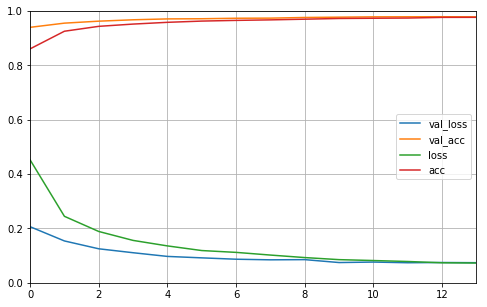

In [25]:
# Create Neural Net Softmax model for the reduced size dataset
snn_clf = Sequential()
# - first Dense
snn_clf.add(Dense(128, input_dim=154, activation="elu", kernel_initializer="he_normal"))
snn_clf.add(Dropout(0.2))
# - second Dense
snn_clf.add(Dense(128, activation="elu", kernel_initializer="he_normal"))
snn_clf.add(Dropout(0.2))
# - output
snn_clf.add(Dense(10, activation="softmax"))

# Early stopping
cp = EarlyStopping(patience=2, restore_best_weights=True)

# Compile model
snn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = snn_clf.fit(X_train_1D_dr, y_train, batch_size=64, epochs=20, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = snn_clf.evaluate(X_test_1D_dr, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

<h2>Predict examples</h2>

Predicted: 7
Actual: 7


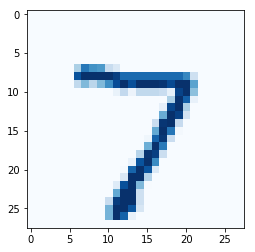

Predicted: 2
Actual: 2


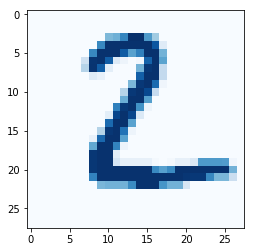

Predicted: 1
Actual: 1


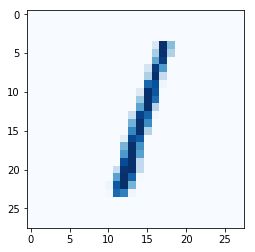

In [26]:
# Examples to classify
examples = X_test_2D[:3]

res = np.argmax(cnn_clf.predict(examples), axis=1)

for i in range(0,len(res)):
    print("Predicted:",res[i])
    print("Actual:",y_test_raw[i])
    plt.imshow(X_test[i], cmap=plt.cm.Blues)
    plt.show()